<a href="https://colab.research.google.com/github/marisbotero/WomenCommunityFest/blob/master/WomenCommunityFest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🌻Women Community Fest

## 💚Entrenando tu primer modelo💚




El problema que vamos a  resolver es convertir de grados Celsius a Fahrenheit, donde la fórmula aproximada es:

$$ f = c* 1.8 + 32 $$


Por supuesto, sería bastante simple crear una función Python convencional que realice directamente este cálculo, pero eso no sería Machine Learning

En cambio, le daremos a TensorFlow algunos valores Celsius de muestra (0, 8, 15, 22, 38) y sus valores Fahrenheit correspondientes (32, 46, 59, 72, 100).Luego, entrenaremos un modelo que resuelva la fórmula anterior a través del proceso de entrenamiento.🎉

## ⭐Importar librerias

💙Vamos a  importar primero TensorFlow. Aquí, lo llamamos `tf` para facilitar su uso. También le decimos que solo muestre errores.


💜A continuación, importanos ([NumPy](http://www.numpy.org/)) como `np`. 
Que nos ayuda a representar nuestros datos como listas de alto rendimiento.

In [0]:
# No importa esta declaración, por razones de compatibilidad.
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np  #numpy es una libreria para hacer operaciones matematicas de alto nivel
import logging   #módulo define funciones y clases que implementan un sistema flexible de registro de eventos para aplicaciones y bibliotecas.
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## 🤓Configurar los datos de entrenamiento

el aprendizaje automático supervisado se trata de descubrir un algoritmo dado un conjunto de entradas y salidas. Dado que la tarea en este Codelab es crear un modelo que pueda dar la temperatura en Fahrenheit cuando se dan los grados en Celsius, creamos dos listas `celsius_q` y` fahrenheit_a` que podemos usar para entrenar nuestro modelo.

In [18]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

#Bucle para visualizar los datos de entrada y salida de nuestro modelo
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### 💜💜Alguna terminología de Machine Learning💜💜

  - **Característica** - La entrada (s) a de nuestro modelo. En este caso, un valor único: los grados en grados Celsius.

  - **Etiquetas** - El resultado que predice de nuestro modelo. En este caso, un valor único: los grados en Fahrenheit.

  - **Ejemplo** - Un par de entradas / salidas utilizadas durante el entrenamiento. En nuestro caso, un par de valores de `celsius_q` y` fahrenheit_a` en un índice específico, como `(22,72)`.

## 📊Creación del modelo

utilizaremos el modelo más simple posible, una red densa. Como el problema es sencillo, esta red requerirá solo una capa, con una sola neurona.

### Construcción de las capas

Llamaremos a la capa `l0` y la crearemos instanciando` tf.keras.layers.Dense` con la siguiente configuración:

* `input_shape = [1]` - Esto especifica que la entrada a esta capa es un valor único. Es decir, la forma es una matriz unidimensional con un miembro. Como esta es la primera (y única) capa, esa forma de entrada es la forma de entrada de todo el modelo. El valor único es un número de coma flotante, que representa grados Celsius.

* `units = 1` - Esto especifica el número de neuronas en la capa. El número de neuronas define cuántas variables internas tiene que tratar la capa para aprender a resolver el problema (más adelante). Dado que esta es la capa final, también es el tamaño de la salida del modelo: un único valor flotante que representa grados Fahrenheit. (En una red de varias capas, el tamaño y la forma de la capa tendrían que coincidir con la `input_shape` de la siguiente capa).

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])


**🍀A menudo veras las capas definidas dentro de la definición del modelo, en lugar de antes**:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## 🔨Ensamblar capas en el modelo
Una vez que se definen las capas, deben ensamblarse en un modelo. La definición del modelo secuencial toma una lista de capas como argumento, especificando el orden de cálculo de la entrada a la salida.

Este modelo tiene una sola capa, l0.

In [0]:
model = tf.keras.Sequential([l0])

## Compilar el modelo, con funciones de pérdida y optimizador

Antes de entrenar, el modelo tiene que ser compilado. Cuando se compila para el entrenamiento, se debe tener presente:

- **Función de pérdida** - Una forma de medir qué tan lejos están las predicciones del resultado deseado. (La diferencia medida se llama "pérdida").

- **Función de optimizador** - Una forma de ajustar los valores internos para reducir la pérdida.

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

* durante el entrenamiento se usa (`model.fit ()`, a continuación) para calcular primero la pérdida en cada punto y luego mejorarla. De hecho, el acto de calcular la pérdida actual de un modelo y luego mejorarlo es precisamente lo que es el entrenamiento.

* Durante el entrenamiento, la función de optimización se usa para calcular los ajustes a las variables internas del modelo. El objetivo es ajustar las variables internas hasta que el modelo (que es realmente una función matemática) refleje la ecuación real para convertir Celsius a Fahrenheit.

* TensorFlow utiliza un análisis numérico para realizar este ajuste, y toda esta complejidad está oculta para nosotros, pero puede consultar la documentación oficial de la librería. Lo que es útil saber sobre estos parámetros son:

💛 Función de pérdida ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) y de optimiazción ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/))utilizados aquí son estándar para modelos simples como este, pero hay muchos otros disponibles. 

🧡Una parte del Optimizador en la que se debe pensar al momento de crear sus propios modelos es la tasa de aprendizaje (`0.1` en el código anterior). Este es el tamaño del paso dado al ajustar los valores en el modelo. Si el valor es demasiado pequeño, se necesitarán demasiadas iteraciones para entrenar el modelo. Demasiado grande y la precisión disminuye. Encontrar un buen valor a menudo implica alguna prueba y error, pero el rango generalmente está dentro de 0.001 (predeterminado) y 0.1

## Entrenar al modelo

para el entrenamiento se usa al método `fit`.

Durante el entrenamiento, el modelo toma valores Celsius, realiza un cálculo utilizando las variables internas actuales (llamadas "pesos") y genera valores que están destinados a ser el equivalente en Fahrenheit. Dado que los pesos se establecen inicialmente al azar, la salida no estará cerca del valor correcto. La diferencia entre la salida real y la salida deseada se calcula utilizando la función de pérdida, y la función de optimización dirige cómo deben ajustarse los pesos.

Este ciclo de cálculo, comparación y ajuste se controla mediante el método `fit`. El primer argumento son las entradas, el segundo argumento son las salidas deseadas. El argumento `epochs` especifica cuántas veces se debe ejecutar este ciclo, y el argumento`verbose` controla cuánta salida produce el método.

In [22]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## 🖤Mostrar estadísticas de entrenamiento

El método `fit` devuelve un objeto de historial. Podemos usar este objeto para trazar cómo la pérdida de nuestro modelo disminuye después de cada época de entrenamiento. Una pérdida alta significa que los grados Fahrenheit que predice el modelo están lejos del valor correspondiente en `fahrenheit_a`.

Usaremos [Matplotlib](https://matplotlib.org/) para visualizar el resultado. Podemos ver, que nuestro modelo que mejora muy rápidamente al principio, y luego tiene una mejora constante y lenta hasta que está muy cerca de "perfecto" hacia el final.

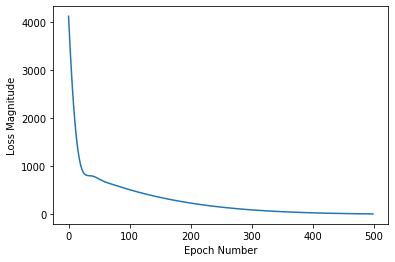

In [23]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Usa el modelo para predecir valores
Ahora tiene un modelo que ha sido entrenado para aprender la relación entre celsius_q y fahrenheit_a. Puede usar el método de predicción para que calcule los grados Fahrenheit para grados Celsius previamente desconocidos.

Entonces, por ejemplo, si el valor Celsius es 100, ¿cuál cree que será el resultado Fahrenheit? Adivina antes de ejecutar este código.

In [25]:
print(model.predict([100.0]))

[[211.31091]]


In [24]:
print(model.predict([200.0]))

[[393.7315]]


La respuesta correcta es $100 \times 1.8 + 32 = 212$, por lo que nuestro modelo está funcionando muy bien.

### Para revisar

* Creamos un modelo con una capa densa
* Lo entrenamos con 3500 ejemplos (7 pares, más de 500 épocas).

Nuestro modelo ajustó las variables (pesos) en la capa Densa hasta que pudo devolver el valor Fahrenheit correcto para cualquier valor Celsius. (Recuerda, 100 Celsius no era parte de nuestros datos de entrenamiento).

💛
Miremos los pesos de las capas
Finalmente, imprimamos las variables internas de la capa Densa.

In [26]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8242059]], dtype=float32), array([28.890324], dtype=float32)]


La primera variable está cerca de ~1.8 y la segunda a ~32. Estos valores (1.8 y 32) son las variables reales en la fórmula de conversión real.

Esto está muy cerca de los valores en la fórmula de conversión. pero para una sola neurona con una sola entrada y una sola salida, la matemática interna se ve igual que la ecuación para una línea, y = mx + b , que tiene la misma forma que la ecuación de conversión, f = 1.8c + 32.

Como la forma es la misma, las variables deberían converger en los valores estándar de 1.8 y 32, que es exactamente lo que sucedió.

Con neuronas adicionales, entradas adicionales y salidas adicionales, la fórmula se vuelve mucho más compleja, pero la idea es la misma.

## Un pequeño experimento

¿qué pasa si creamos más capas densas con diferentes unidades, que por lo tanto también tienen más variables?

In [30]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("modelo Entrenado")
print(model.predict([100.0]))
print("El modelo predice que 100 grados Celsius es: {} degrees Fahrenheit".format(model.predict([100.0])))
print("Estas son las variables l0: {}".format(l0.get_weights()))
print("Estas son las variables l1: {}".format(l1.get_weights()))
print("Estas son las variables l2: {}".format(l2.get_weights()))

modelo Entrenado
[[211.74742]]
El modelo predice que 100 grados Celsius es: [[211.74742]] degrees Fahrenheit
Estas son las variables l0: [array([[ 0.3246479 , -0.44471374,  0.3519336 ,  0.47655118]],
      dtype=float32), array([-2.1597958, -2.965732 ,  3.2282057,  2.9031734], dtype=float32)]
Estas son las variables l1: [array([[ 0.16277708, -0.6455838 , -0.37417307,  1.2702874 ],
       [ 0.2583555 , -1.4351561 ,  0.21593063,  0.49102926],
       [-0.41825512,  0.7729473 ,  0.6837816 , -1.1204852 ],
       [-1.2662185 , -0.0706034 ,  1.1226771 , -0.08175172]],
      dtype=float32), array([-3.2581205,  2.1666749,  3.3820887, -3.174176 ], dtype=float32)]
Estas son las variables l2: [array([[-1.2487088 ],
       [ 0.3800037 ],
       [ 0.6725286 ],
       [-0.64496267]], dtype=float32), array([3.0652053], dtype=float32)]


este modelo también puede predecir el valor Fahrenheit correspondiente realmente bien. Pero cuando observa las variables (pesos) en las capas l0 y l1, ni siquiera se acercan a ~ 1.8 y ~ 32. La complejidad añadida oculta la forma "simple" de la ecuación de conversión.
